# Random Forest

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

In [16]:
print(digits.keys())
print(digits.data.shape)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 64)


<Figure size 432x288 with 0 Axes>

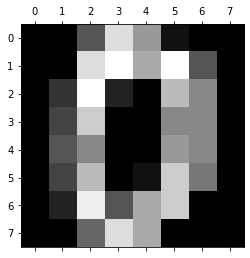

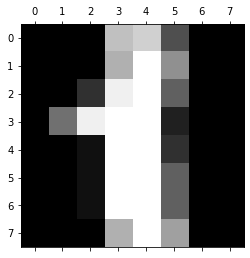

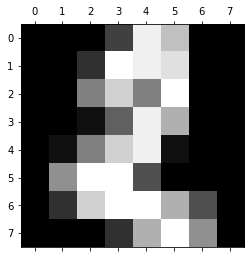

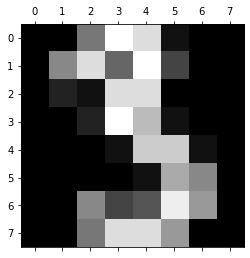

In [7]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [15]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [18]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [22]:
from sklearn.model_selection import train_test_split
x=df.drop(['target'],axis='columns')
y=df['target']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [40]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\vikram\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
model.score(x_test, y_test)

0.9361111111111111

In [42]:
y_predicted=model.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)

In [44]:
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  2,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  2,  2],
       [ 0,  0,  0,  0, 24,  0,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 23,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 26,  0],
       [ 0,  1,  0,  2,  0,  1,  0,  0,  3, 37]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

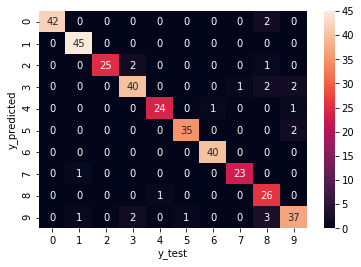

In [46]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel("y_test")
plt.ylabel("y_predicted")